In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
import collections
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RandomizedLasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import (LogisticRegression, RandomizedLogisticRegression)
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import linear_model

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('/Users/Sriram/Documents/Soundz_Interview_Prep/learning/springboard/capstone_project/data/bank-full.csv',delimiter=";")
data.columns
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
training_features = ['job', 'education', 'default', 'balance', 'housing','loan']
target = 'y'

In [4]:
train_x, test_x, train_y, test_y = train_test_split(data[training_features], data[target], train_size=0.7)
    
print("train_x size :: ", train_x.shape)
print("train_y size :: ", train_y.shape)
 
print("test_x size :: ", test_x.shape)
print("test_y size :: ", test_y.shape)

train_x size ::  (31647, 6)
train_y size ::  (31647,)
test_x size ::  (13564, 6)
test_y size ::  (13564,)


In [5]:
selectedcols=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in selectedcols:
    catlist='var'+'_'+var
    catlist = pd.get_dummies(data[var], prefix=var)
    data1=data.join(catlist)
    data=data1
selectedcols=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in selectedcols]

In [6]:
data_final=data[to_keep]
data_final['y'] = data_final['y'].map({'yes': 1, 'no': 0})
data_final.columns


/Users/Sriram/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [7]:
data_final_vars=list(data_final.columns.values)
Y = ['y']
X=[i for i in data_final_vars if i not in Y]
data_final.shape

(45211, 52)

Using feature regression we are selecting the features which has most relevance to our problem.
We going to take two set of data's. 
1. 70-30 train and test split for which attributes are selected using feature selection
2. 80-20 split with attributes selected from ridgecv.

Goal - predict using classification algorithms if a client will subscribe to term deposit.

1. Logistic regression
2. Decision Tree
3. SVM
4. Random Forest

In [8]:
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[Y])
print(rfe.support_)
print(rfe.ranking_)

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False  True False  True False False  True False
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True]
[32 34 29 31 16 33 28 26 19 11  6 25  2 22 21  1 24  7 14 17  4 27  5  9 23
 10 12  8 20  1 30  1  3 13  1 18  1  1  1  1  1 15  1  1  1  1  1  1  1  1
  1]


Using LassoCV and RidgeCV to estimate cooeficient of the attributes. The values greather than zero indicates feature importance

In [9]:
lassocv = linear_model.LassoCV()
lassocv.fit(data_final[X], data_final[Y])
lassocv_score = lassocv.score(data_final[X], data_final[Y])
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CV [  0.00000000e+00   4.63660318e-06  -0.00000000e+00   4.89827630e-04
  -0.00000000e+00   3.23741537e-04   0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00]


LassoCV is unstable in a similar way as unregularized linear models are meaning that the coefficients (and thus feature ranks) can vary significantly even on small data changes when there are correlated features in the data. 
So we will use RidgeCV which is L2 regularization.

In [10]:
alpha_range = 10.**np.arange(-3, 3)
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='mean_squared_error')
ridgeregcv.fit(data_final[X], data_final[Y])
ridgeregcv.alpha_
ridgeregcv.coef_

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

array([[  1.78486103e-04,   1.23567387e-06,   9.75015223e-04,
          4.71030004e-04,  -1.54446208e-03,  -6.26637114e-05,
          1.07178610e-03,   8.26886427e-03,  -9.66469687e-03,
         -1.53656136e-02,  -2.44566146e-02,  -1.57358670e-03,
          3.66123044e-02,  -1.25015871e-02,  -4.52272247e-03,
          7.91400027e-02,  -2.19043168e-03,   2.34920720e-03,
         -1.79805784e-02,   1.89857027e-03,  -9.93505405e-03,
          1.07808126e-02,  -1.16329930e-02,  -4.57588458e-03,
          1.26917122e-02,   8.79895942e-05,   5.13786599e-04,
         -5.13786599e-04,   2.44419129e-02,  -2.44419129e-02,
          1.19593793e-02,  -1.19593793e-02,   3.80648198e-02,
          2.59060503e-02,  -4.99562606e-02,   3.11688479e-02,
         -4.15722200e-02,   1.66834891e-01,   1.43292787e-02,
         -8.13095368e-02,  -4.24800029e-02,   4.52094903e-02,
          3.09020021e-01,  -1.53331336e-03,  -4.57736682e-02,
          1.87699607e-01,   1.94642533e-01,  -3.75707951e-02,
        

Using RidgeCV we have obtained 25 features which are important for our data prediction

In [11]:
data_final[X].columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

Feature Selection -18 attributes for our first set of analysis

In [12]:
cols=['job_student','housing_yes','loan_yes','contact_unknown','month_aug', 'month_dec', 'month_feb','month_jan', 'month_jul','month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success','poutcome_unknown'] 
X1=data_final[cols]
Y1=data_final['y']


In [13]:
X1.head()
Y1.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

Logistic regression - Since the values of our considered data set are binary than linear we are going to use logistic regression model for our prediction.

From our logistic regression we obtain a p value of zero meaning its statistically highly significant as P < 0.001 

In [14]:
import statsmodels.api as sm
logit_model=sm.Logit(Y1,X1)
result=logit_model.fit()
print(result.summary())


/Users/Sriram/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.304282
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45193
Method:                           MLE   Df Model:                           17
Date:                Sun, 21 Jan 2018   Pseudo R-squ.:                  0.1568
Time:                        16:35:20   Log-Likelihood:                -13757.
converged:                       True   LL-Null:                       -16315.
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
job_student          0.4880      0.084      5.789      0.000       0.323       0.653
housing_yes

We can infer that the value of p from logistic regression is zero.

In [15]:
data_final.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

Logistic Regression is done on 70-30% train and test split. From the below prediction its clear that we get a accuracy of 0.89 using logistic regression.

With Precision Score and Recall score of 0.61 and 0.19

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
lreg = logreg.fit(X_train, y_train)

In [17]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Precision score for logistic regression classifier {:.2f}'.format(precision_score(y_test, lreg.predict(X_test))))
print('Recall score for logistic regression classifier {:.2f}'.format(recall_score(y_test, lreg.predict(X_test))))

Accuracy of logistic regression classifier on test set: 0.89
Precision score for logistic regression classifier 0.61
Recall score for logistic regression classifier 0.19


In [18]:
print(metrics.confusion_matrix(y_test, y_pred))

[[11774   195]
 [ 1289   306]]


From logisticregression we can see that predictive model for this data set is 0.89 percent accurate. We will analysis the confusion matrix for all the models at later part of our experiment.

Apply kfold cross validation on the test and train split. With varying the number of fold we found that 3 split provided more accuracy.

In [19]:

kfold = model_selection.KFold(n_splits=3, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("k-fold cross validation average accuracy: %.2f" % (results.mean()))

k-fold cross validation average accuracy: 0.89


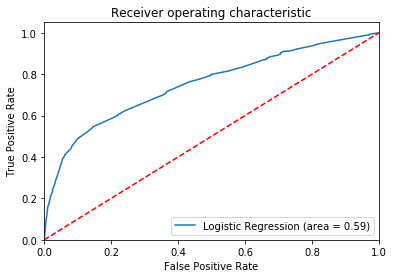

In [20]:

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [21]:
X2 = data_final[X]
Y2 = data_final[Y]


Decision Tree model with entropy and gini with max depth of 810 on train and test data

In [22]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(X2, Y2,test_size =0.3)

In [23]:
model_dt1 = DecisionTreeClassifier(max_depth = 810, criterion ="entropy")
model_dt1.fit(x_train0, y_train0)
y_pred_dt0 = model_dt1.predict_proba(x_test0)[:, 1]

In [24]:
model_dt = DecisionTreeClassifier(max_depth = 810, criterion ="gini")
model_dt.fit(x_train0, y_train0)
y_pred_dt0 = model_dt.predict_proba(x_test0)[:, 1]


In [25]:
model_dt1.feature_importances_

array([ 0.07640066,  0.09678693,  0.08986869,  0.28525032,  0.02907244,
        0.04075604,  0.01200318,  0.00640748,  0.00385199,  0.00273754,
        0.0018587 ,  0.00843887,  0.00163144,  0.00194765,  0.0052257 ,
        0.0018658 ,  0.00807399,  0.00267865,  0.00070746,  0.00620496,
        0.00759769,  0.00705496,  0.00352033,  0.00917196,  0.00867919,
        0.0041379 ,  0.        ,  0.00040911,  0.02169813,  0.00464135,
        0.00564278,  0.00406822,  0.00467159,  0.00132331,  0.0335148 ,
        0.01084628,  0.0108959 ,  0.00339541,  0.01323827,  0.00613526,
        0.01140925,  0.00791169,  0.00920973,  0.00921278,  0.00973743,
        0.01313534,  0.00686206,  0.00305082,  0.00180354,  0.08426791,
        0.00098851])

In [26]:
x_train0.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [27]:
model_dt.feature_importances_

array([ 0.08270458,  0.10661154,  0.07724675,  0.270589  ,  0.03480322,
        0.04423081,  0.01269639,  0.00946458,  0.00436355,  0.00553483,
        0.00351583,  0.00604673,  0.00271574,  0.00355286,  0.0061922 ,
        0.00580957,  0.0067507 ,  0.00449237,  0.00138498,  0.00717281,
        0.01129046,  0.0076355 ,  0.00476068,  0.007315  ,  0.00738013,
        0.00489963,  0.00035543,  0.00165163,  0.02245806,  0.00314607,
        0.00449704,  0.00399971,  0.00649363,  0.00052174,  0.00922815,
        0.01545006,  0.00712061,  0.00409499,  0.0090784 ,  0.00393501,
        0.00594432,  0.01360306,  0.01383085,  0.00957393,  0.00831039,
        0.01315213,  0.00583192,  0.00409041,  0.00372935,  0.08909357,
        0.00164908])

In [28]:
fpr_dt, tpr_dt,_ = roc_curve(y_test0, y_pred_dt0)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [29]:
print('Precision score for Decision Tree{:.2f} '.format(precision_score(y_test0,y_pred_dt0)))
print('Recall score for Decision Tree {:.2f} '.format(recall_score(y_test0, y_pred_dt0)))
print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test0, y_pred_dt0))

Precision score for Decision Tree0.47 
Recall score for Decision Tree 0.46 
Confusion Matrix for Decision Tree 
 [[11150   829]
 [  856   729]]


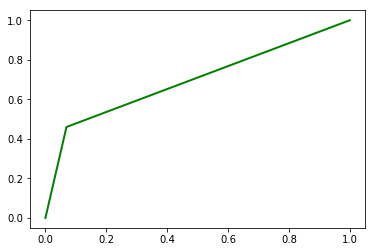

In [30]:
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=2, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)

Applying SVM model on train and test split with 70-30% 

In [31]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X2, Y2,test_size =0.3)

In [32]:
model_bayes = svm.SVC()

model_bayes.fit(x_train1, y_train1)
pred_bayes = model_bayes.fit(x_train1, y_train1)
y_pred_bayes = pred_bayes.decision_function(x_test1)
fprbayes, tprbayes, _= roc_curve(y_test1, y_pred_bayes)
roc_auc_bayes = auc(fprbayes, tprbayes)

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
print('Precision score for SVM{:.2f} '.format(precision_score(y_test1,pred_bayes.predict(x_test1) )))
print('Recall score for SVM {:.2f}'.format(recall_score(y_test1,pred_bayes.predict(x_test1))))
print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test1, pred_bayes.predict(x_test1)))

Precision score for SVM0.50 
Recall score for SVM 0.00
Confusion Matrix for SVM 
 [[11954     1]
 [ 1608     1]]


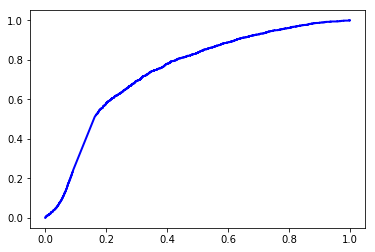

In [34]:
plt.plot(fprbayes, tprbayes, color='blue',lw=2, label='svm(AUC = %0.5f)' % roc_auc_bayes)

Random Forest on 70-30% train and test set

In [35]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2,test_size =0.3)

In [36]:
y_test2.count()


y    13564
dtype: int64

In [37]:
y_test2.loc[y_test2['y'] == 1].count()/y_test2.count()

y    0.114863
dtype: float64

In [38]:
model_rf = RandomForestClassifier(max_depth = 10, n_estimators = 150)
model_pred = model_rf.fit(x_train2, y_train2)
y_pred_rf = model_rf.predict_proba(x_test2)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test2, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


/Users/Sriram/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [39]:
print('Precision score for Random forest{:.2f} '.format(precision_score(y_test2,model_pred.predict(x_test2))))
print('Recall score for Random forest {:.2f}'.format(recall_score(y_test2,model_pred.predict(x_test2))))
print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test2, model_pred.predict(x_test2)))

Precision score for Random forest0.75 
Recall score for Random forest 0.19
Confusion Matrix for Random forest 
  [[11908    98]
 [ 1260   298]]


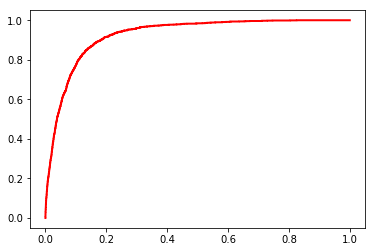

In [40]:
plt.plot(fpr_rf, tpr_rf, color='red',lw=2, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)

Below chart displays the ROC with False and True rates for each of the above models 

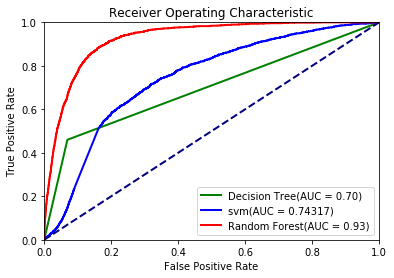

In [41]:
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=2, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot(fprbayes, tprbayes, color='blue',
         lw=2, label='svm(AUC = %0.5f)' % roc_auc_bayes)
plt.plot(fpr_rf, tpr_rf, color='red',
         lw=2, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

* Logistic - Accuracy of logistic regression classifier on test set: 0.89
* Precision score for logistic regression classifier 0.60
* Decision - Precision score for Decision Tree 0.48 
* SVM - Precision score for SVM 0.33
* Random Forest - Precision score for Random forest 0.79

From the precision score its clear that Random forest has the highest score compared to other classification techniques. And Accuracy of logistic regression is higher and closer to 1


For predicting if a client will subscribe to term deposit or not, the main point to consider while evaluating our models is recall score. Since the number of false negatives and true negatives are important.

Below list the recall score and confusion matrix for all the 4 models which we used to do our predictive analysis

In [42]:
print('Recall score for logistic regression classifier {:.2f}'.format(recall_score(y_test, lreg.predict(X_test))))
print('Recall score for Decision Tree {:.2f} '.format(recall_score(y_test0, y_pred_dt0)))
print('Recall score for SVM {:.2f}'.format(recall_score(y_test1,pred_bayes.predict(x_test1))))
print('Recall score for Random forest {:.2f}'.format(recall_score(y_test2,model_pred.predict(x_test2))))

Recall score for logistic regression classifier 0.19
Recall score for Decision Tree 0.46 
Recall score for SVM 0.00
Recall score for Random forest 0.19


In [43]:
print("Confusion matrix \n TP FN\n")
print (" FP TN ")       
print('Confusion Matrix for Logistic regression \n', metrics.confusion_matrix(y_test, y_pred))

print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test0, y_pred_dt0))

print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test1, pred_bayes.predict(x_test1)))

print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test2, model_pred.predict(x_test2)))


Confusion matrix 
 TP FN

 FP TN 
Confusion Matrix for Logistic regression 
 [[11774   195]
 [ 1289   306]]
Confusion Matrix for Decision Tree 
 [[11150   829]
 [  856   729]]
Confusion Matrix for SVM 
 [[11954     1]
 [ 1608     1]]
Confusion Matrix for Random forest 
  [[11908    98]
 [ 1260   298]]


From the above confusion matrix, Decision tree have the largest number of FN and TN, and high recall score - its clear that decision tree is not best model for our predictive analysis.

SVM has low number of FN and TN but its catergoizing all the values into True positive and false positive and not taking clear consideration about the negatives. So its not a ideal model for our problem

Logistic Regression and Random forest seems to have lower recall score and lower number of false negatives.
From our analysis of confusion matrix its clear that random forest seems to be best suited approach.


Applying the same models with 80-20% train and test set and features selected using ridgecv.

In [44]:
cols1 =['age','balance','day','duration','previous','job_admin.','job_retired','job_student','job_unemployed','marital_divorced','marital_single','education_tertiary','education_unknown','default_no','housing_no','loan_no','contact_cellular','contact_telephone','month_apr','month_dec','month_feb','month_jun','month_mar','month_oct','month_sep','poutcome_success']
X3=data_final[cols1]
Y3=data_final['y']

Logistic Regression

In [45]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
lreg = logreg.fit(X_train3, y_train3)

In [46]:
y_pred3 = logreg.predict(X_test3)
print('Recall score for logistic regression classifier {:.2f}'.format(recall_score(y_test3, y_pred3)))
print(metrics.confusion_matrix(y_test3, y_pred3))

Recall score for logistic regression classifier 0.35
[[7751  229]
 [ 691  372]]


Decision Tree

In [47]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(X3, Y3,test_size =0.2)

In [48]:
model_dt = DecisionTreeClassifier(max_depth = 810, criterion ="gini")
model_dt.fit(x_train4, y_train4)
y_pred_dt4 = model_dt.predict_proba(x_test4)[:, 1]

In [49]:
fpr_dt, tpr_dt,_ = roc_curve(y_test4, y_pred_dt4)
roc_auc_dt1 = auc(fpr_dt, tpr_dt)

In [50]:
print('Recall score for Decision Tree {:.2f} '.format(recall_score(y_test4, y_pred_dt4)))
print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test4, y_pred_dt4))

Recall score for Decision Tree 0.45 
Confusion Matrix for Decision Tree 
 [[7370  631]
 [ 573  469]]


SVM

In [51]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(X3, Y3,test_size =0.2)

In [52]:
model_bayes = svm.SVC()

model_bayes.fit(x_train5, y_train5)
pred_bayes = model_bayes.fit(x_train5, y_train5)
y_pred_bayes5 = pred_bayes.decision_function(x_test5)
fprbayes, tprbayes, _= roc_curve(y_test5, y_pred_bayes5)
roc_auc_bayes2 = auc(fprbayes, tprbayes)

In [53]:
print('Recall score for SVM {:.2f}'.format(recall_score(y_test5,pred_bayes.predict(x_test5))))
print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test5, pred_bayes.predict(x_test5)))

Recall score for SVM 0.00
Confusion Matrix for SVM 
 [[7983    0]
 [1059    1]]


Random forest

In [54]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(X3, Y3,test_size =0.2)

In [55]:
model_rf = RandomForestClassifier(max_depth = 10, n_estimators = 150)
model_pred = model_rf.fit(x_train6, y_train6)
y_pred_rf6 = model_rf.predict_proba(x_test6)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test6, y_pred_rf6)
roc_auc_rf3 = auc(fpr_rf, tpr_rf)


In [56]:
print('Recall score for Random forest {:.2f}'.format(recall_score(y_test6,model_pred.predict(x_test6))))
print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test6, model_pred.predict(x_test6)))

Recall score for Random forest 0.24
Confusion Matrix for Random forest 
  [[7901   92]
 [ 802  248]]


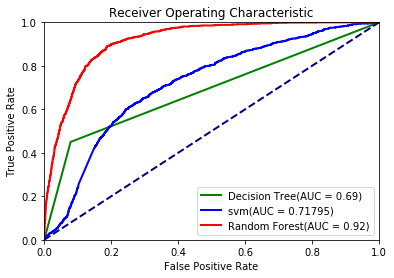

In [57]:
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=2, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt1)
plt.plot(fprbayes, tprbayes, color='blue',
         lw=2, label='svm(AUC = %0.5f)' % roc_auc_bayes2)
plt.plot(fpr_rf, tpr_rf, color='red',
         lw=2, label='Random Forest(AUC = %0.2f)' % roc_auc_rf3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [58]:
print('Recall score for logistic regression classifier {:.2f}'.format(recall_score(y_test3, y_pred3)))
print('Recall score for Decision Tree {:.2f} '.format(recall_score(y_test4, y_pred_dt4)))
print('Recall score for SVM {:.2f}'.format(recall_score(y_test5,pred_bayes.predict(x_test5))))
print('Recall score for Random forest {:.2f}'.format(recall_score(y_test6,model_pred.predict(x_test6))))

Recall score for logistic regression classifier 0.35
Recall score for Decision Tree 0.45 
Recall score for SVM 0.00
Recall score for Random forest 0.24


In [59]:
print("Confusion matrix with 80-20 \n TP FN\n")
print (" FP TN ")       
print('Confusion Matrix for Logistic regression \n', metrics.confusion_matrix(y_test3, y_pred3))

print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test4, y_pred_dt4))

print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test5, pred_bayes.predict(x_test5)))

print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test6, model_pred.predict(x_test6)))

Confusion matrix with 80-20 
 TP FN

 FP TN 
Confusion Matrix for Logistic regression 
 [[7751  229]
 [ 691  372]]
Confusion Matrix for Decision Tree 
 [[7370  631]
 [ 573  469]]
Confusion Matrix for SVM 
 [[7983    0]
 [1059    1]]
Confusion Matrix for Random forest 
  [[7901   92]
 [ 802  248]]


Similar to our 70-30 split our 80-20% train and test split follows the same hypothesis.

From the above confusion matrix, Decision tree have the largest number of FN and TN, and high recall score - its clear that decision tree is not best model for our predictive analysis.

SVM has low number of FN and TN but its catergoizing all the values into True positive and false positive and not taking clear consideration about the negatives. So its not a ideal model for our problem

Logistic Regression and Random forest seems to have lower recall score and lower number of false negatives.
From our analysis of confusion matrix its clear that random forest seems to be best suited approach.
